## Diagnostic HW - Part 1


### Graffiti Data Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set(color_codes=True)
from datetime import datetime
import matplotlib
%matplotlib inline

In [2]:
graffiti = pd.read_csv('graffiti_removal.csv')

In [3]:
graffiti['Type of Service Request'].value_counts()

Graffiti Removal    120510
Name: Type of Service Request, dtype: int64

In [4]:
graffiti.shape

(120510, 18)

Type of request is identical for the dataframe. I will drop location and coordinates data since I am not performing geo-analysis, and I will drop SSA and Service Request Number columns. 

In [5]:
sum(pd.isnull(graffiti["Completion Date"]))

0

Seems like they only input things after they are complete... not sure but something is fishy. 

In [6]:
sum(pd.isnull(graffiti['SSA']))

87594

In [7]:
sum(pd.isnull(graffiti['SSA']))/graffiti.shape[0]

0.72686084142394825

In [8]:
graffiti.drop('Service Request Number', axis=1, inplace=True)
graffiti.drop("Street Address", axis=1, inplace=True)
graffiti.drop("X Coordinate", axis=1, inplace=True)
graffiti.drop("Y Coordinate", axis=1, inplace=True)
graffiti.drop("Latitude", axis=1, inplace=True)
graffiti.drop("Longitude", axis=1, inplace=True)
graffiti.drop("SSA", axis=1, inplace=True)
graffiti.drop("Location", axis=1, inplace=True)

In [9]:
graffiti.head()

,Creation Date,Status,Completion Date,Type of Service Request,What Type of Surface is the Graffiti on?,Where is the Graffiti located?,ZIP Code,Ward,Police District,Community Area
0,01/01/2016,Completed,01/04/2016,Graffiti Removal,Brick - Unpainted,Front,60639.0,35.0,25.0,20.0
1,01/01/2016,Completed,01/04/2016,Graffiti Removal,Brick - Unpainted,Alley,60647.0,35.0,14.0,22.0
2,01/01/2016,Completed,01/04/2016,Graffiti Removal,Brick - Unpainted,Side,60632.0,12.0,9.0,59.0
3,01/01/2016,Completed,01/04/2016,Graffiti Removal,Metal - Painted,Front,60626.0,49.0,24.0,1.0
4,01/01/2016,Completed,01/04/2016,Graffiti Removal,Metal - Painted,Front,60626.0,49.0,24.0,1.0


In [10]:
def days_between(d1, d2):
    d1 = datetime.strptime(d1, '%m/%d/%Y')
    d2 = datetime.strptime(d2, '%m/%d/%Y')
    return abs((d2 - d1).days)

In [11]:
a = list(graffiti['Creation Date'])
b = list(graffiti['Completion Date'])
combined = list(zip(a,b))
days_list = []

for i in combined:
    start, end = i
    if type(start) and type(end) == str:
        days = days_between(start, end)
        days_list.append(days)

df_days = pd.DataFrame({'Response Time (Days)': days_list})
graffiti = pd.concat([graffiti,df_days], axis=1)
month_list = []

for i in graffiti['Creation Date']:
    clean = datetime.strptime(i, '%m/%d/%Y')
    month_list.append(clean.month)

df_months = pd.DataFrame({'Month': month_list})
graffiti = pd.concat([graffiti,df_months], axis=1)

In [12]:
graffiti.head()

,Creation Date,Status,Completion Date,Type of Service Request,What Type of Surface is the Graffiti on?,Where is the Graffiti located?,ZIP Code,Ward,Police District,Community Area,Response Time (Days),Month
0,01/01/2016,Completed,01/04/2016,Graffiti Removal,Brick - Unpainted,Front,60639.0,35.0,25.0,20.0,3,1
1,01/01/2016,Completed,01/04/2016,Graffiti Removal,Brick - Unpainted,Alley,60647.0,35.0,14.0,22.0,3,1
2,01/01/2016,Completed,01/04/2016,Graffiti Removal,Brick - Unpainted,Side,60632.0,12.0,9.0,59.0,3,1
3,01/01/2016,Completed,01/04/2016,Graffiti Removal,Metal - Painted,Front,60626.0,49.0,24.0,1.0,3,1
4,01/01/2016,Completed,01/04/2016,Graffiti Removal,Metal - Painted,Front,60626.0,49.0,24.0,1.0,3,1


In [13]:
sum(graffiti['Ward'] == 0.0)

82

In [14]:
sum(graffiti['ZIP Code'] == 0.0)

42

In [15]:
sum(graffiti['Police District'] == 0.0)

58

In [16]:
sum(graffiti['Community Area'] == 0.0)

82

In [17]:
# drop Ward, ZIP Code, Police District, Community Area zero values since those do not exist
graffiti = graffiti.drop(graffiti.index[graffiti['Ward'] == 0.0])
graffiti = graffiti.drop(graffiti.index[graffiti['ZIP Code'] == 0.0])
graffiti = graffiti.drop(graffiti.index[graffiti['Police District'] == 0.0])
graffiti = graffiti.drop(graffiti.index[graffiti['Community Area'] == 0.0])

In [18]:
graffiti['Response Time (Days)'].groupby(graffiti['ZIP Code']).describe().unstack()

,count,mean,std,min,25%,50%,75%,max
ZIP Code,,,,,,,,
60601.0,645.0,0.773643,1.122160,0.0,0.0,0.0,1.0,5.0
60602.0,133.0,0.571429,0.955730,0.0,0.0,0.0,1.0,5.0
60603.0,110.0,0.472727,0.864266,0.0,0.0,0.0,1.0,4.0
60604.0,76.0,0.381579,0.848011,0.0,0.0,0.0,0.0,5.0
60605.0,734.0,0.717984,1.168377,0.0,0.0,0.0,1.0,8.0
60606.0,337.0,0.575668,0.976389,0.0,0.0,0.0,1.0,6.0
60607.0,1009.0,0.596630,1.074058,0.0,0.0,0.0,1.0,10.0
60608.0,8544.0,0.546114,0.927920,0.0,0.0,0.0,1.0,7.0
60609.0,5199.0,0.495288,0.894560,0.0,0.0,0.0,1.0,8.0


In [19]:
graffiti['Response Time (Days)'].groupby(graffiti['ZIP Code']).describe().unstack()['mean'].idxmax()

60649.0

In [20]:
graffiti['Response Time (Days)'].groupby(graffiti['ZIP Code']).describe().unstack()['mean'].max()

1.1511627906976745

In [21]:
graffiti['Response Time (Days)'].groupby(graffiti['ZIP Code']).describe().unstack()['mean'].idxmin()

60666.0

In [22]:
graffiti['Response Time (Days)'].groupby(graffiti['ZIP Code']).describe().unstack()['mean'].min()

0.0

Zip code 60649 had the longest mean response time of slightly over one day, while 60666 had the quickest response time of within one day. 

In [23]:
graffiti['Response Time (Days)'].groupby(graffiti['ZIP Code']).describe().unstack()['count'].idxmax()

60632.0

In [24]:
graffiti['Response Time (Days)'].groupby(graffiti['ZIP Code']).describe().unstack()['count'].max()

14137.0

In [25]:
graffiti['Response Time (Days)'].groupby(graffiti['ZIP Code']).describe().unstack()['count'].idxmin()

60635.0

In [26]:
graffiti['Response Time (Days)'].groupby(graffiti['ZIP Code']).describe().unstack()['count'].min()

1.0

Zip code 60632 had the largest number of graffiti requests while 60635 had the fewest

In [27]:
def hist_plt(df, col, xlab, vertical=False, sort=True):
    '''
    Function to plot histograms.
    '''
    plt.figure(figsize=(16,12))
    if sort:
        hist_idx = df[col].value_counts()
    else:
        hist_idx = df[col].value_counts(sort=False)
    if vertical:
            graph=sns.countplot(y=col, saturation=1, data=df, order=hist_idx.index)
            plt.ylabel(xlab)
            plt.xlabel('Num Requests')
    else:
        graph=sns.countplot(x=col, saturation=1, data=df, order=hist_idx.index)
        plt.xlabel(xlab)
        plt.ylabel('Num Requests')
    plt.title('Histogram Request Counts by '+col)
    plt.show()

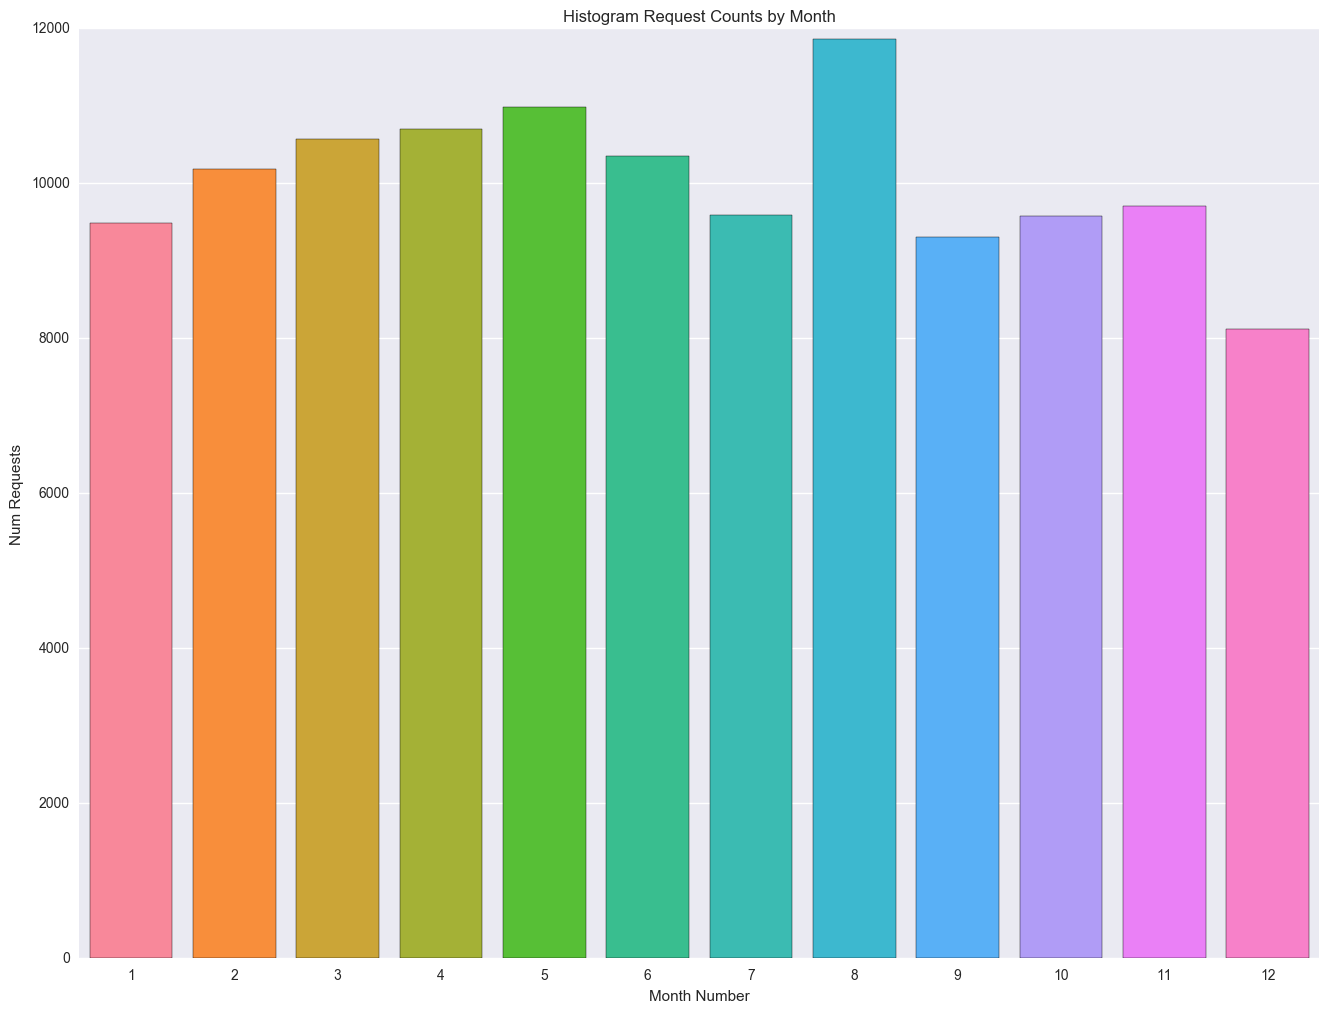

In [28]:
hist_plt(graffiti, 'Month', 'Month Number', vertical=False, sort=False)

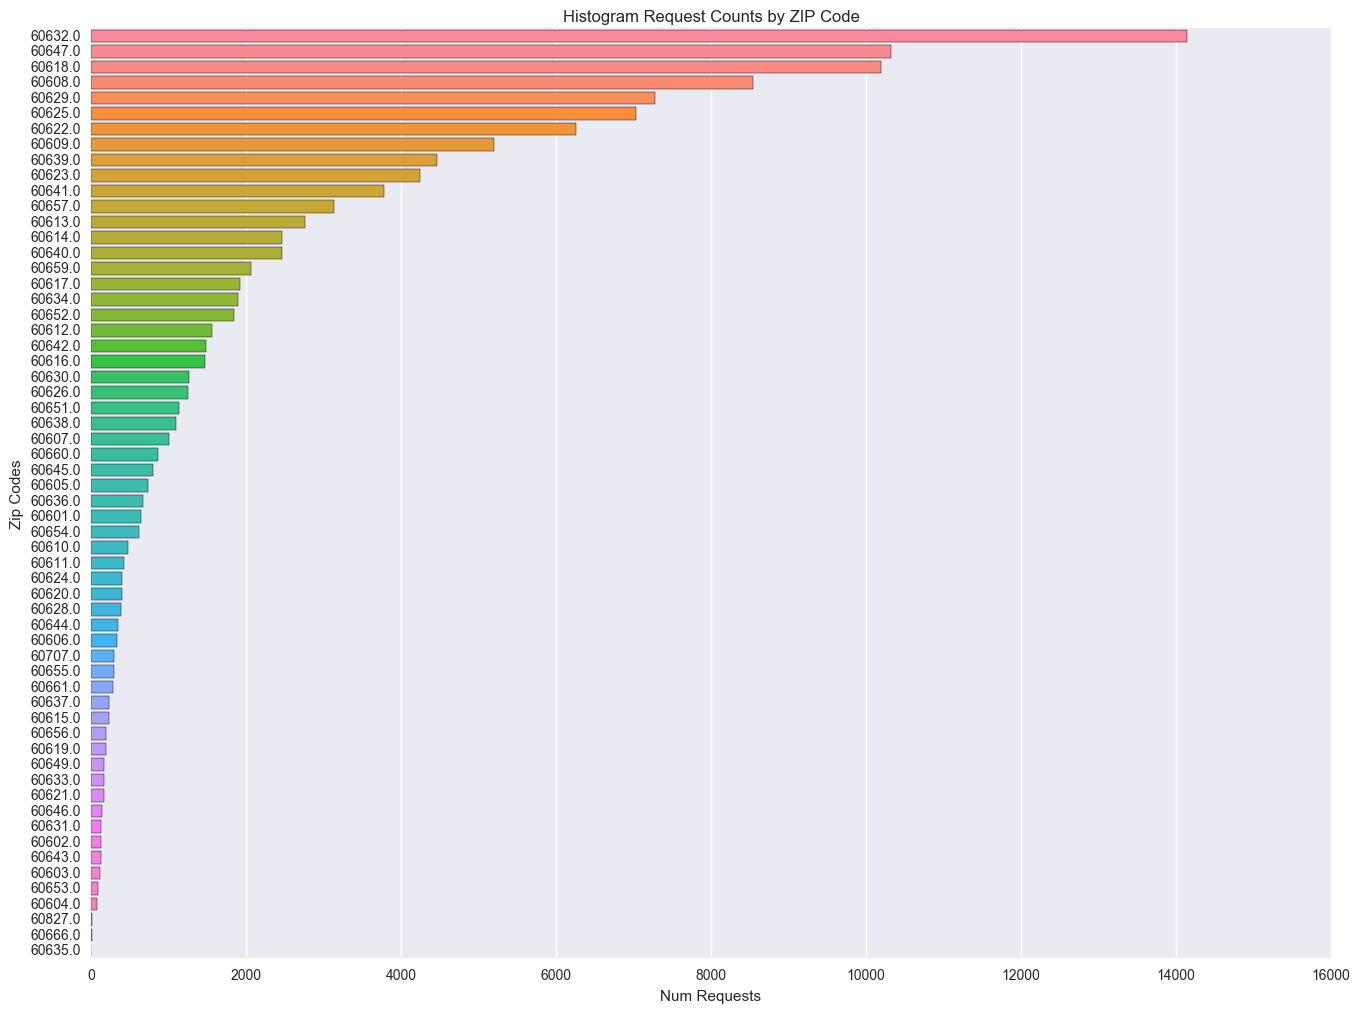

In [29]:
hist_plt(graffiti, 'ZIP Code', 'Zip Codes', vertical=True, sort=True)

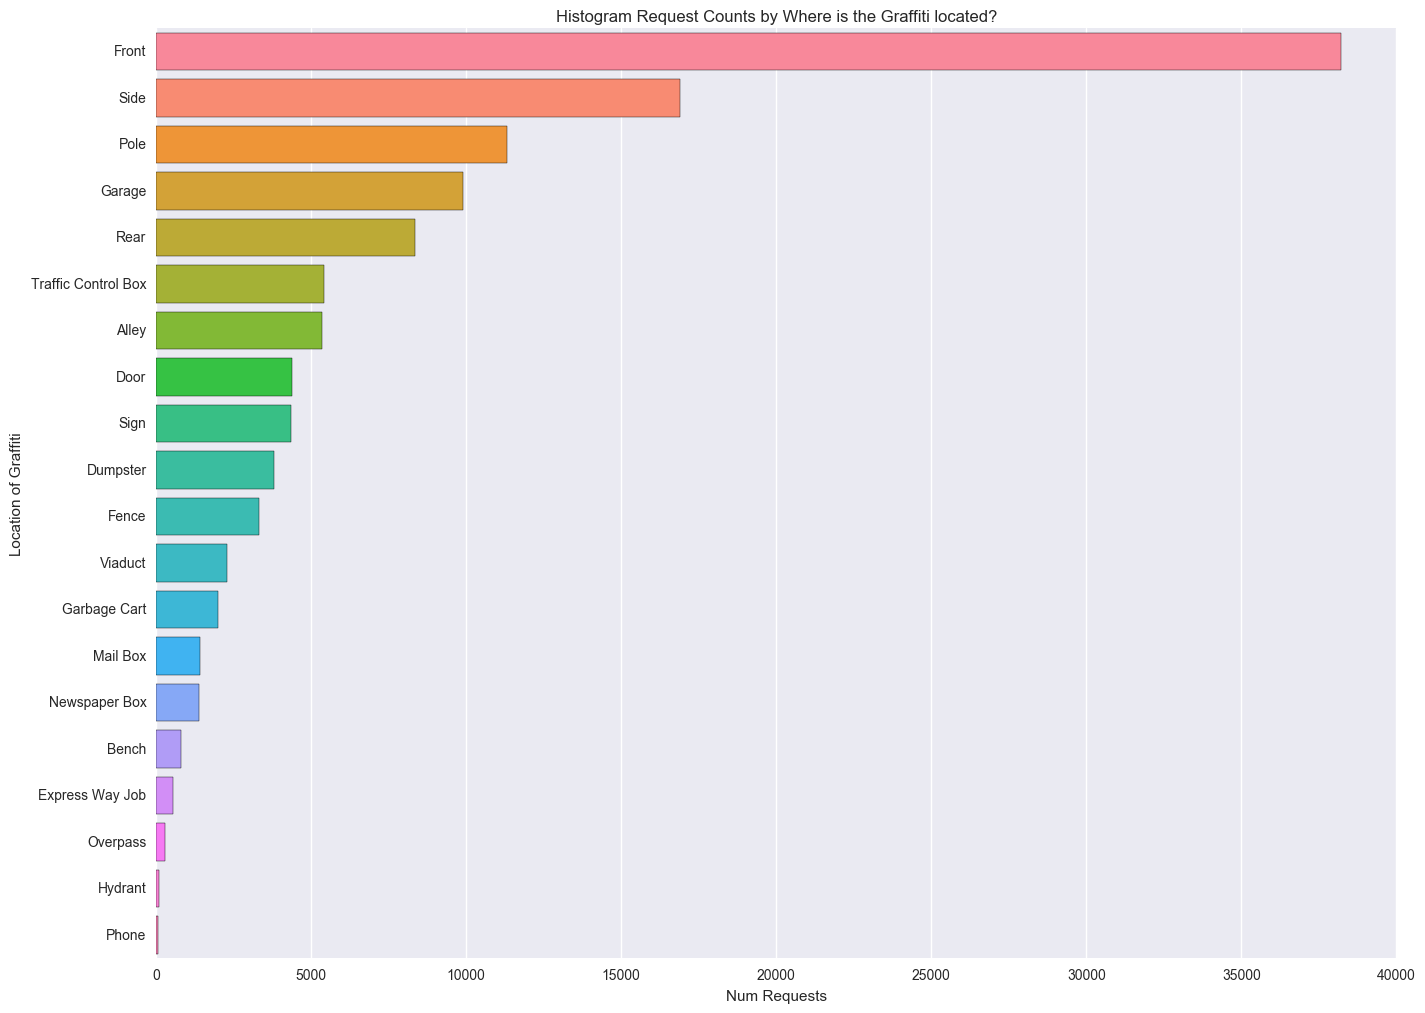

In [30]:
hist_plt(graffiti, 'Where is the Graffiti located?', 'Location of Graffiti', vertical=True, sort=True)

In [31]:
graffiti['Response Time (Days)'].groupby([graffiti['ZIP Code'], graffiti['Where is the Graffiti located?']]).describe().unstack()

count      mean       std  min   25%  \
ZIP Code Where is the Graffiti located?                                         
60601.0  Alley                            11.0  1.090909  1.136182  0.0  0.00   
         Bench                             7.0  0.285714  0.755929  0.0  0.00   
         Door                             26.0  0.500000  0.948683  0.0  0.00   
         Dumpster                          7.0  0.000000  0.000000  0.0  0.00   
         Express Way Job                  11.0  1.818182  0.873863  0.0  1.50   
         Fence                            23.0  1.391304  1.157550  0.0  1.00   
         Front                           268.0  0.589552  1.089361  0.0  0.00   
         Garage                            1.0  1.000000       NaN  1.0  1.00   
         Garbage Cart                      2.0  0.000000  0.000000  0.0  0.00   
         Mail Box                          2.0  2.500000  2.121320  1.0  1.75   
         Newspaper Box                     1.0  0.000000       NaN  0.0  0.00   
         Overpass                         32.0  0.281250  0.634206  0.0  0.00   
         Pole                             84.0  0.940476  1.165273  0.0  0.00   
         Rear                              8.0  0.750000  0.886405  0.0  0.00   
         Side                             77.0  1.532468  1.107206  0.0  1.00   
         Sign                             13.0  0.846154  1.068188  0.0  0.00   
         Traffic Control Box              66.0  0.363636  0.834568  0.0  0.00   
         Viaduct                           6.0  1.500000  1.760682  0.0  1.00   
60602.0  Alley                             8.0  1.000000  1.309307  0.0  0.00   
         Bench                             1.0  0.000000       NaN  0.0  0.00   
         Door                              3.0  0.000000  0.000000  0.0  0.00   
         Dumpster                          4.0  0.250000  0.500000  0.0  0.00   
         Express Way Job                   1.0  0.000000       NaN  0.0  0.00   
         Fence                             4.0  0.750000  0.957427  0.0  0.00   
         Front                            39.0  0.282051  0.646803  0.0  0.00   
         Garage                            1.0  1.000000       NaN  1.0  1.00   
         Garbage Cart                      1.0  0.000000       NaN  0.0  0.00   
         Mail Box                          1.0  1.000000       NaN  1.0  1.00   
         Newspaper Box                     1.0  0.000000       NaN  0.0  0.00   
         Pole                             12.0  0.250000  0.621582  0.0  0.00   
...                                        ...       ...       ...  ...   ...   
60661.0  Side                             45.0  0.644444  1.090362  0.0  0.00   
         Sign                              2.0  1.000000  0.000000  1.0  1.00   
         Traffic Control Box              46.0  0.739130  1.042109  0.0  0.00   
         Viaduct                           1.0  0.000000       NaN  0.0  0.00   
60666.0  Front                             7.0  0.000000  0.000000  0.0  0.00   
         Garage                            1.0  0.000000       NaN  0.0  0.00   
         Traffic Control Box               1.0  0.000000       NaN  0.0  0.00   
60707.0  Alley                             7.0  1.000000  0.577350  0.0  1.00   
         Bench                             4.0  0.500000  1.000000  0.0  0.00   
         Door                             10.0  0.300000  0.674949  0.0  0.00   
         Dumpster                          3.0  0.000000  0.000000  0.0  0.00   
         Fence                             6.0  0.666667  0.816497  0.0  0.00   
         Front                           100.0  0.210000  0.555869  0.0  0.00   
         Garage                           28.0  0.928571  0.766356  0.0  0.00   
         Garbage Cart                      5.0  0.400000  0.894427  0.0  0.00   
         Mail Box                          2.0  0.500000  0.707107  0.0  0.25   
         Newspaper Box                     6.0  0.000000  0.000000  0.0 

In [32]:
graffiti['Response Time (Days)'].groupby([graffiti['Where is the Graffiti located?'], graffiti['What Type of Surface is the Graffiti on?']]).describe().unstack()

count  \
Where is the Graffiti located? What Type of Surface is the Graffiti on?           
Alley                          Aluminum Siding                            287.0   
                               Asphalt                                     26.0   
                               Brick - Painted                           1067.0   
                               Brick - Unpainted                         1436.0   
                               Cement (Sidewalk, Alley, Wall, Curb)       410.0   
                               Glass                                       13.0   
                               Limestone                                   14.0   
                               Marble/Granite                               6.0   
                               Metal - Painted                           1043.0   
                               Metal - Unpainted                          132.0   
                               Other / Unknown Surface                     64.0   
                               Other/Unknown Surface                      208.0   
                               Stucco                                      16.0   
                               Tree                                         1.0   
                               Vinyl Siding                               218.0   
                               Wood - Painted                             242.0   
                               Wood - Unpainted                           145.0   
Bench                          Asphalt                                      4.0   
                               Brick - Painted                              6.0   
                               Brick - Unpainted                           12.0   
                               Cement (Sidewalk, Alley, Wall, Curb)        56.0   
                               Glass                                        6.0   
                               Limestone                                    3.0   
                               Metal - Painted                            144.0   
                               Metal - Unpainted                           52.0   
                               Other / Unknown Surface                      4.0   
                               Other/Unknown Surface                       29.0   
                               Tree                                         1.0   
                               Vinyl Siding                                 3.0   
                               Wood - Painted                             370.0   
...                                                                         ...   
Sign                           Other / Unknown Surface                     28.0   
                               Other/Unknown Surface                      240.0   
                               Vinyl Siding                                 8.0   
                               Wood - Painted                             106.0   
                               Wood - Unpainted                            23.0   
Traffic Control Box            Aluminum Siding                              6.0   
                               Brick - Painted                             14.0   
                               Brick - Unpainted                            6.0   
                               Cement (Sidewalk, Alley, Wall, Curb)        14.0   
                               Limestone                                    1.0   
                               Marble/Granite                               1.0   
                               Metal - Painted                           5210.0   
                               Metal - Unpainted                          133.0   
                               Other / Unknown Surface                      2.0   
                               Other/Unknown Surface                        9.0   
                               Tree                                         2.0   
       

In [33]:
graffiti['Response Time (Days)'].groupby([graffiti['Police District'], graffiti['ZIP Code']]).describe().unstack()

count      mean       std  min  25%  50%   75%  \
Police District ZIP Code                                                    
1.0             60601.0    626.0  0.752396  1.119015  0.0  0.0  0.0  1.00   
                60602.0    133.0  0.571429  0.955730  0.0  0.0  0.0  1.00   
                60603.0    110.0  0.472727  0.864266  0.0  0.0  0.0  1.00   
                60604.0     76.0  0.381579  0.848011  0.0  0.0  0.0  0.00   
                60605.0    734.0  0.717984  1.168377  0.0  0.0  0.0  1.00   
                60606.0    322.0  0.580745  0.986514  0.0  0.0  0.0  1.00   
                60607.0    202.0  0.648515  1.233941  0.0  0.0  0.0  1.00   
                60610.0      1.0  2.000000       NaN  2.0  2.0  2.0  2.00   
                60616.0    222.0  0.513514  0.991957  0.0  0.0  0.0  1.00   
                60654.0      1.0  1.000000       NaN  1.0  1.0  1.0  1.00   
                60661.0    112.0  0.848214  1.075609  0.0  0.0  1.0  1.00   
2.0             60609.0     36.0  0.166667  0.447214  0.0  0.0  0.0  0.00   
                60615.0    226.0  0.809735  1.152425  0.0  0.0  0.0  1.00   
                60616.0     18.0  0.333333  0.594089  0.0  0.0  0.0  0.75   
                60621.0     15.0  0.533333  0.915475  0.0  0.0  0.0  1.00   
                60637.0     76.0  0.618421  1.095045  0.0  0.0  0.0  1.00   
                60653.0     93.0  0.784946  1.196457  0.0  0.0  0.0  1.00   
3.0             60619.0     38.0  0.921053  1.099916  0.0  0.0  1.0  1.00   
                60621.0     17.0  1.176471  1.975958  0.0  0.0  0.0  1.00   
                60637.0    152.0  0.894737  1.196894  0.0  0.0  0.5  1.00   
                60649.0    112.0  0.883929  1.063273  0.0  0.0  1.0  1.00   
4.0             60617.0   1918.0  0.489051  0.945922  0.0  0.0  0.0  1.00   
                60619.0     72.0  0.791667  1.266441  0.0  0.0  0.0  1.00   
                60633.0    169.0  0.538462  1.040833  0.0  0.0  0.0  1.00   
                60649.0     60.0  1.650000  1.866974  0.0  0.0  1.0  3.00   
5.0             60628.0    314.0  0.490446  1.033730  0.0  0.0  0.0  1.00   
                60633.0      1.0  0.000000       NaN  0.0  0.0  0.0  0.00   
                60643.0     13.0  1.000000  1.224745  0.0  0.0  1.0  1.00   
                60827.0     11.0  1.000000  1.095445  0.0  0.0  1.0  1.00   
6.0             60619.0     77.0  0.636364  0.723826  0.0  0.0  1.0  1.00   
...                          ...       ...       ...  ...  ...  ...   ...   
18.0            60614.0   1157.0  0.668107  1.106193  0.0  0.0  0.0  1.00   
                60642.0     95.0  0.494737  0.756162  0.0  0.0  0.0  1.00   
                60654.0    534.0  0.599251  0.900531  0.0  0.0  0.0  1.00   
19.0            60613.0   2758.0  0.498187  0.943737  0.0  0.0  0.0  1.00   
                60614.0   1188.0  0.583333  0.960356  0.0  0.0  0.0  1.00   
                60618.0   2358.0  0.830365  1.063959  0.0  0.0  1.0  1.00   
                60625.0   1545.0  0.690615  1.018009  0.0  0.0  0.0  1.00   
                60640.0   1170.0  0.608547  1.040133  0.0  0.0  0.0  1.00   
                60647.0     33.0  0.727273  1.179850  0.0  0.0  0.0  1.00   
                60657.0   3139.0  0.567378  1.004213  0.0  0.0  0.0  1.00   
20.0            60625.0   1690.0  0.720710  0.969082  0.0  0.0  0.0  1.00   
                60640.0   1292.0  0.497678  0.897105  0.0  0.0  0.0  1.00   
                60659.0    562.0  0.663701  0.926381  0.0  0.0  0.0  1.00   
                60660.0    419.0  0.825776  1.214231  0.0  0.0  0.0  1.00   
22.0            60620.0     50.0  0.620000  1.307592  0.0  0.0  0.0  0.00   
                60628.0     67.0  0.358209  0.732399  0.0  0.0  0.0  0.50   
                60643.0    113.0  0.504425  1.053259  0.0  0.0  0.0  1.00   
                60655.0    290.0  0.165517  0.696147  0.0  0.0  0.0  0.00   
24.0            60626.0   1246.0  0.651685  1.031563  0.0  0.0  0.0  1.00   
                60645.0

In [34]:
graffiti['Response Time (Days)'].groupby([graffiti['Police District'], graffiti['ZIP Code']]).describe().unstack()['mean'].idxmax()

(1.0, 60610.0)

In [35]:
graffiti['Response Time (Days)'].groupby([graffiti['Police District'], graffiti['ZIP Code']]).describe().unstack()['mean'].max()

2.0

From the above we can see that the Zip Code 60610, in the 1st Police District had the highest mean response time of 2 days

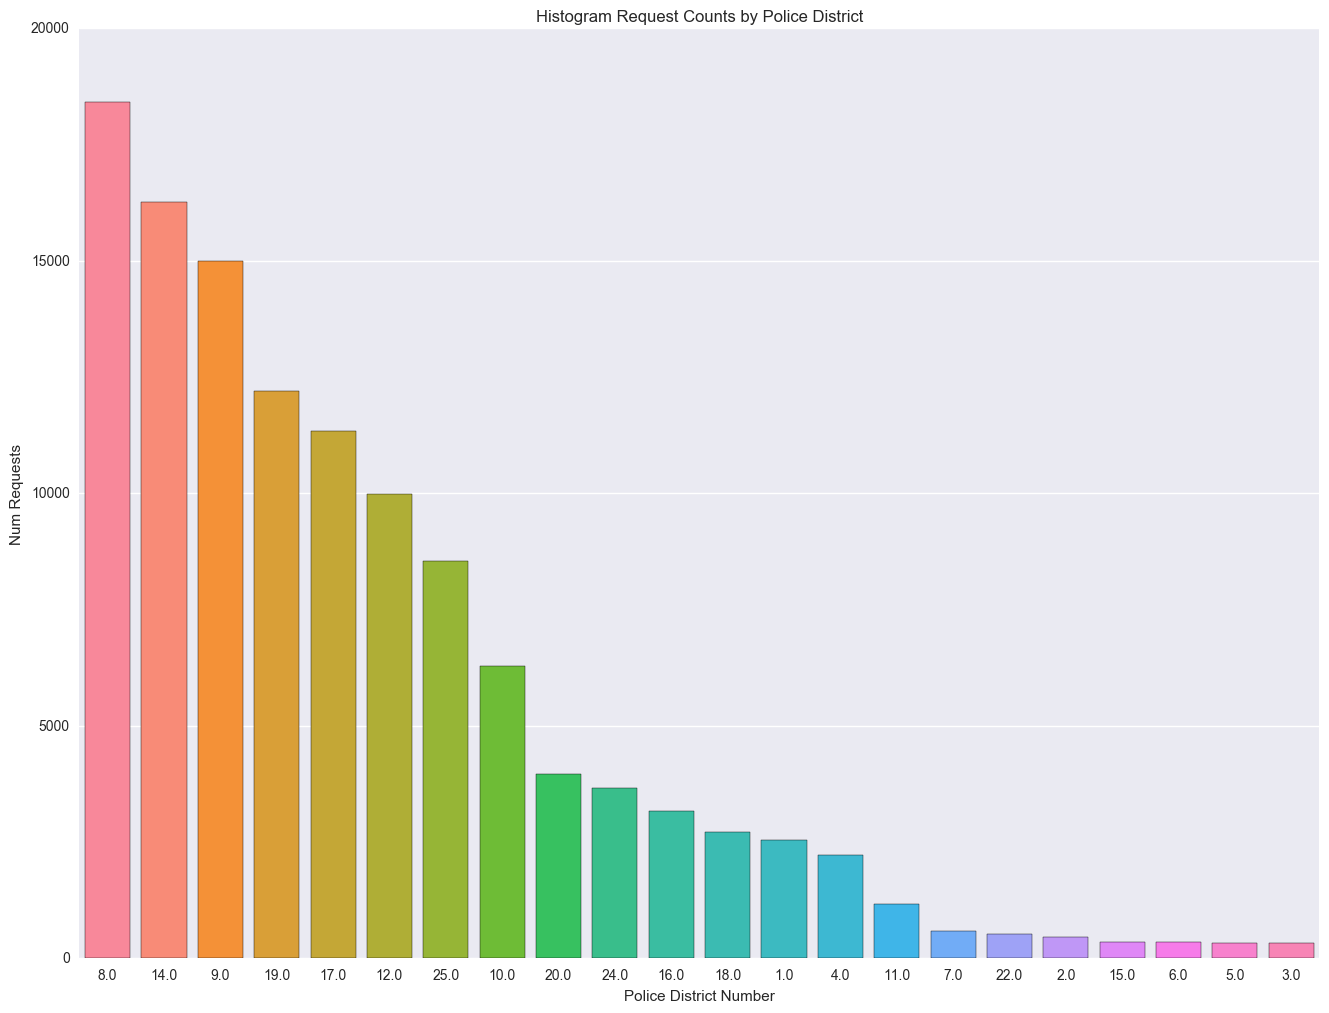

In [36]:
hist_plt(graffiti, 'Police District', 'Police District Number', vertical=False, sort=True)

### Vacant & Abondoned Buildings Data Exploration

In [37]:
buildings = pd.read_csv('vacant_buildings.csv')
buildings.head()

,SERVICE REQUEST TYPE,SERVICE REQUEST NUMBER,DATE SERVICE REQUEST WAS RECEIVED,"LOCATION OF BUILDING ON THE LOT (IF GARAGE, CHANGE TYPE CODE TO BGD).",IS THE BUILDING DANGEROUS OR HAZARDOUS?,IS BUILDING OPEN OR BOARDED?,"IF THE BUILDING IS OPEN, WHERE IS THE ENTRY POINT?",IS THE BUILDING CURRENTLY VACANT OR OCCUPIED?,IS THE BUILDING VACANT DUE TO FIRE?,"ANY PEOPLE USING PROPERTY? (HOMELESS, CHILDEN, GANGS)",...,ADDRESS STREET SUFFIX,ZIP CODE,X COORDINATE,Y COORDINATE,Ward,Police District,Community Area,LATITUDE,LONGITUDE,Location
0,Vacant/Abandoned Building,16-00017936,01/02/2016,Front,NaN,Open,FRONT-SIDE AND REAR,Vacant,False,True,...,ST,60621.0,1.170327e+06,1.865488e+06,16.0,7.0,68.0,41.786386,-87.651033,"(41.78638640364335, -87.65103294840148)"
1,Vacant/Abandoned Building,16-00027497,01/03/2016,Front,NaN,Open,NaN,Vacant,False,False,...,ST,60629.0,1.153522e+06,1.862608e+06,23.0,8.0,66.0,41.778832,-87.712726,"(41.778832091928, -87.7127256067861)"
2,Vacant/Abandoned Building,16-00035418,01/03/2016,Front,NaN,Open,"CALLER DOESN'T KNOW THE EXACT ADDRESS, CALLER ...",Vacant,False,False,...,ST,60636.0,1.167017e+06,1.865600e+06,16.0,7.0,67.0,41.786764,-87.663167,"(41.786764299374006, -87.66316688619024)"
3,Vacant/Abandoned Building,16-00031311,01/03/2016,Front,NaN,Open,FRONT ENTRY,Vacant,False,False,...,AVE,60620.0,1.173188e+06,1.849430e+06,21.0,6.0,71.0,41.742258,-87.641018,"(41.74225776568885, -87.64101798247111)"
4,Vacant/Abandoned Building,16-00035051,01/03/2016,Rear,NaN,Open,REAR,Vacant,False,False,...,ST,60620.0,1.170063e+06,1.851007e+06,21.0,6.0,71.0,41.746654,-87.652421,"(41.74665406968148, -87.65242142853317)"


In [38]:
buildings.shape

(4475, 23)

In [39]:
buildings.drop('SERVICE REQUEST TYPE', axis=1, inplace=True)
buildings.drop('SERVICE REQUEST NUMBER', axis=1, inplace=True)
buildings.drop('ADDRESS STREET NUMBER', axis=1, inplace=True)
buildings.drop('ADDRESS STREET DIRECTION', axis=1, inplace=True)
buildings.drop('ADDRESS STREET NAME', axis=1, inplace=True)
buildings.drop('ADDRESS STREET SUFFIX', axis=1, inplace=True)
buildings.drop('X COORDINATE', axis=1, inplace=True)
buildings.drop('Y COORDINATE', axis=1, inplace=True)
buildings.drop('LATITUDE', axis=1, inplace=True)
buildings.drop('LONGITUDE', axis=1, inplace=True)
buildings.drop('Location', axis=1, inplace=True)

In [40]:
buildings.shape

(4475, 12)

In [41]:
sum(pd.isnull(buildings['IS THE BUILDING DANGEROUS OR HAZARDOUS?']))

4475

In [42]:
# drop since it is empty
buildings.drop('IS THE BUILDING DANGEROUS OR HAZARDOUS?', axis=1, inplace=True)

In [43]:
month_list = []

for i in buildings['DATE SERVICE REQUEST WAS RECEIVED']:
    clean = datetime.strptime(i, '%m/%d/%Y')
    month_list.append(clean.month)

df_months = pd.DataFrame({'Month': month_list})
buildings = pd.concat([buildings,df_months], axis=1)

In [44]:
buildings = buildings.drop(buildings.index[buildings['Ward'] == 0.0])
buildings = buildings.drop(buildings.index[buildings['ZIP CODE'] == 0.0])
buildings = buildings.drop(buildings.index[buildings['Police District'] == 0.0])
buildings = buildings.drop(buildings.index[buildings['Community Area'] == 0.0])

In [45]:
buildings.shape

(4474, 12)

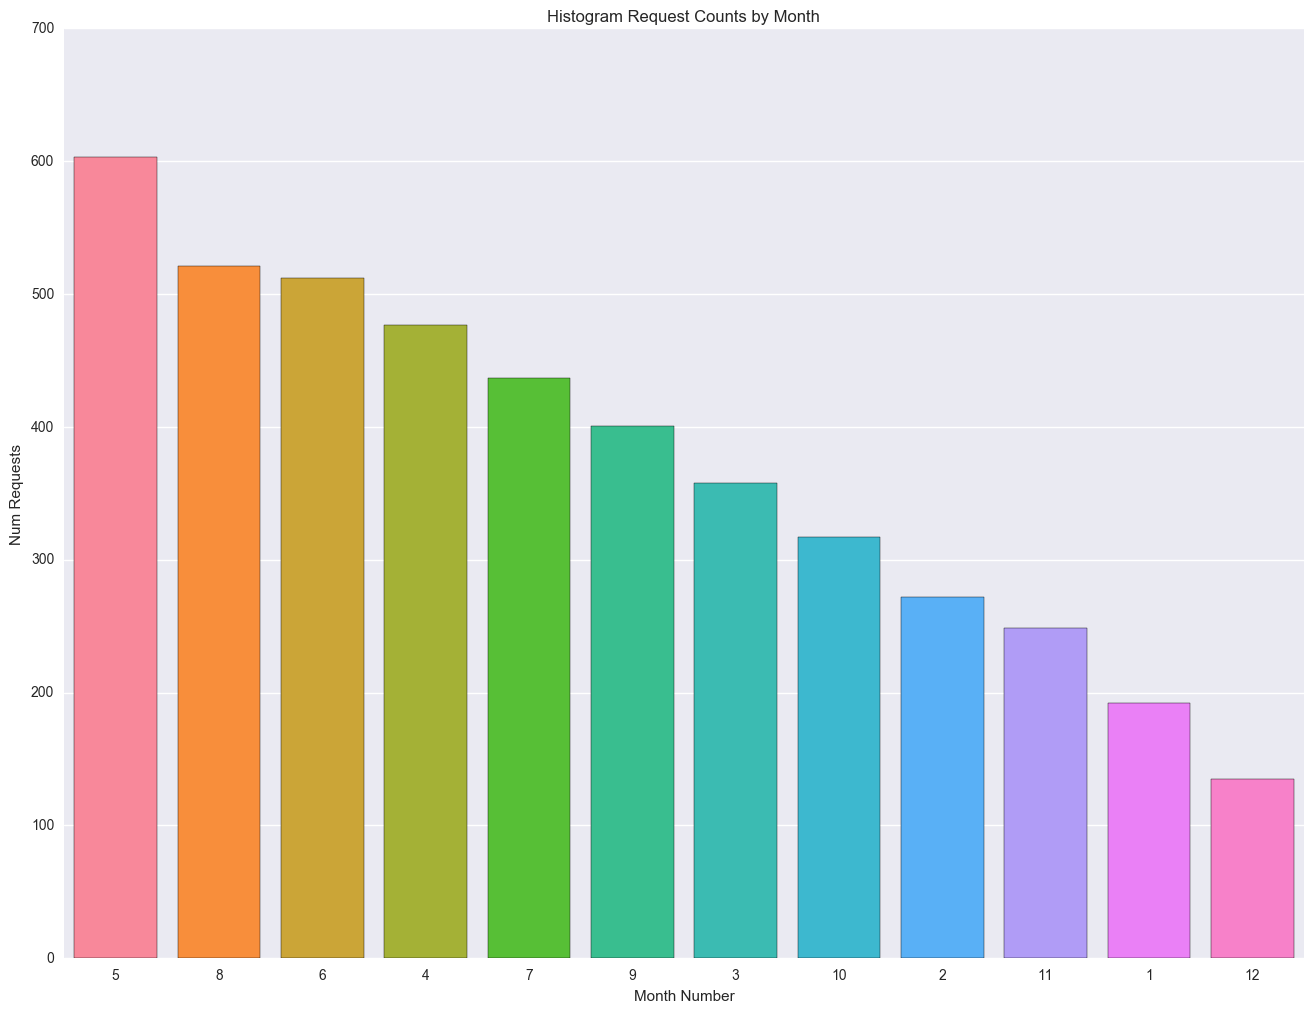

In [46]:
hist_plt(buildings, 'Month', 'Month Number', vertical=False, sort=True)

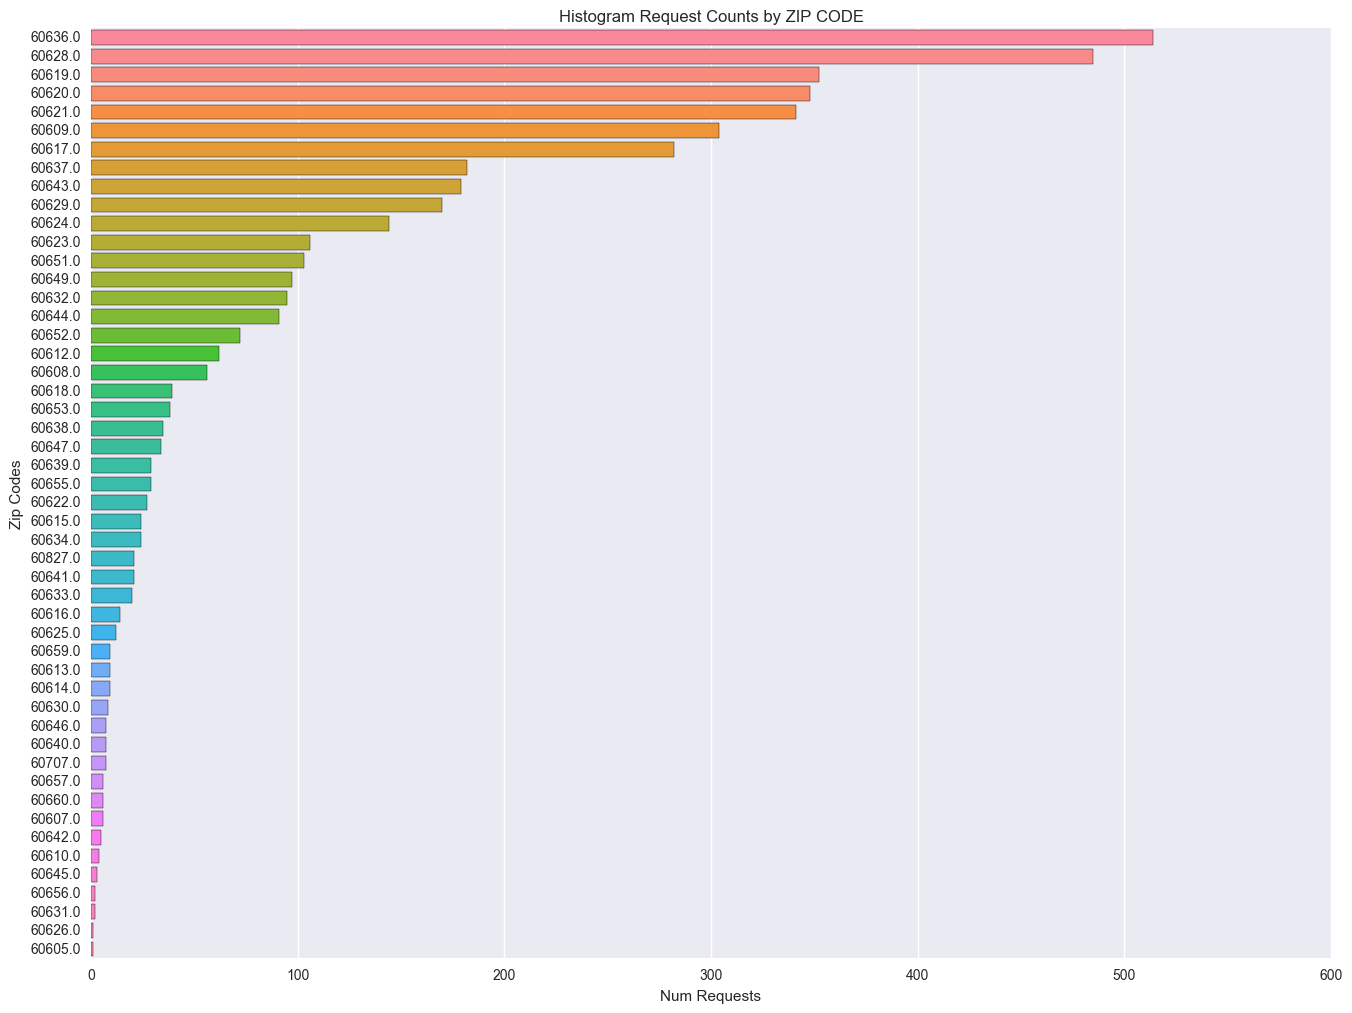

In [47]:
hist_plt(buildings, 'ZIP CODE', 'Zip Codes', vertical=True, sort=True)

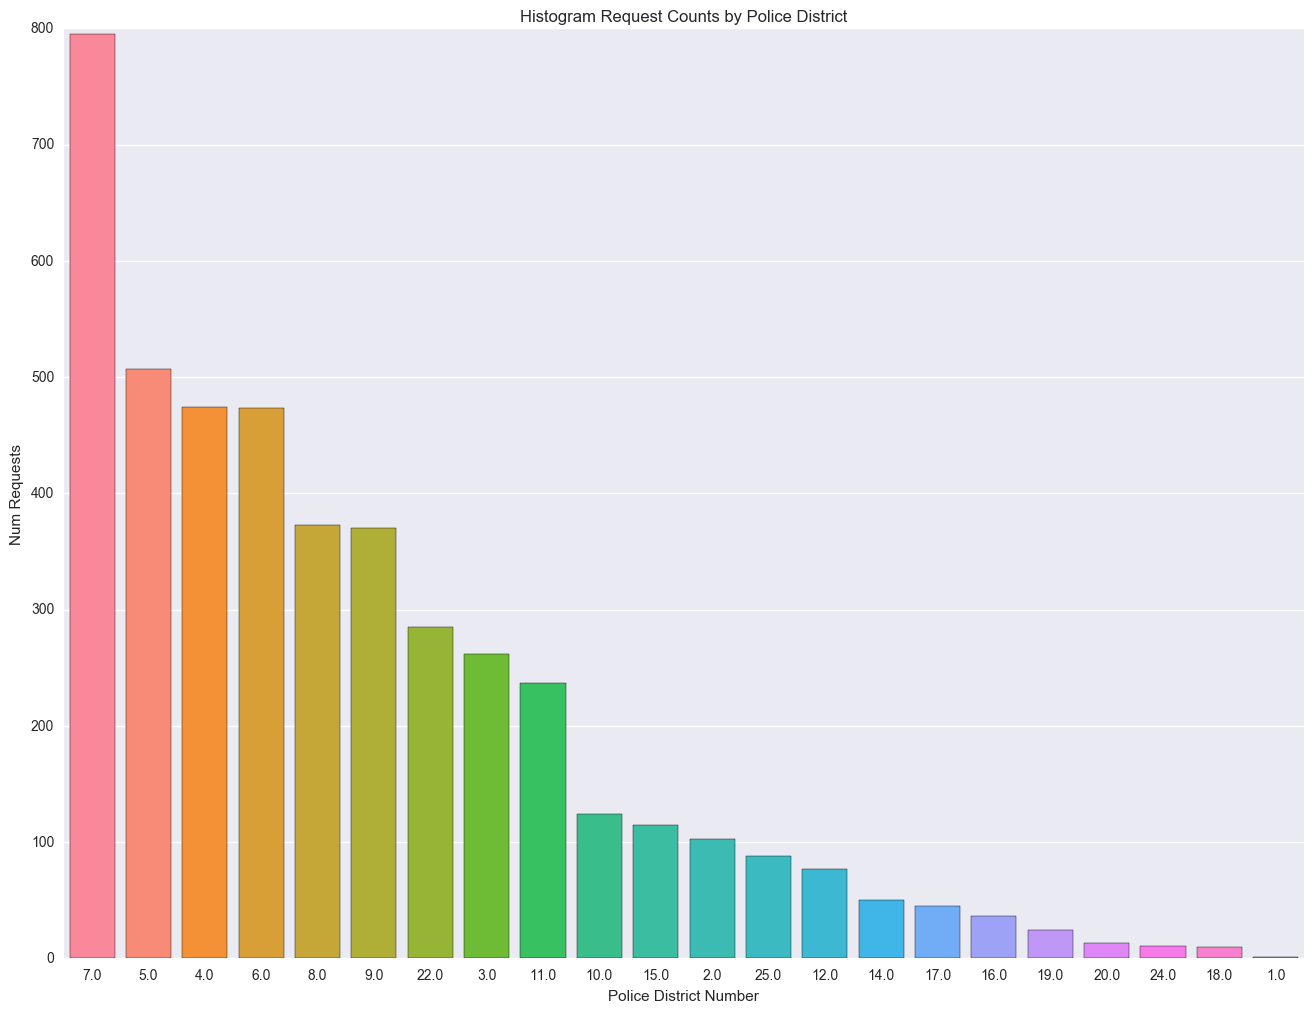

In [48]:
hist_plt(buildings, 'Police District', 'Police District Number', vertical=False, sort=True)

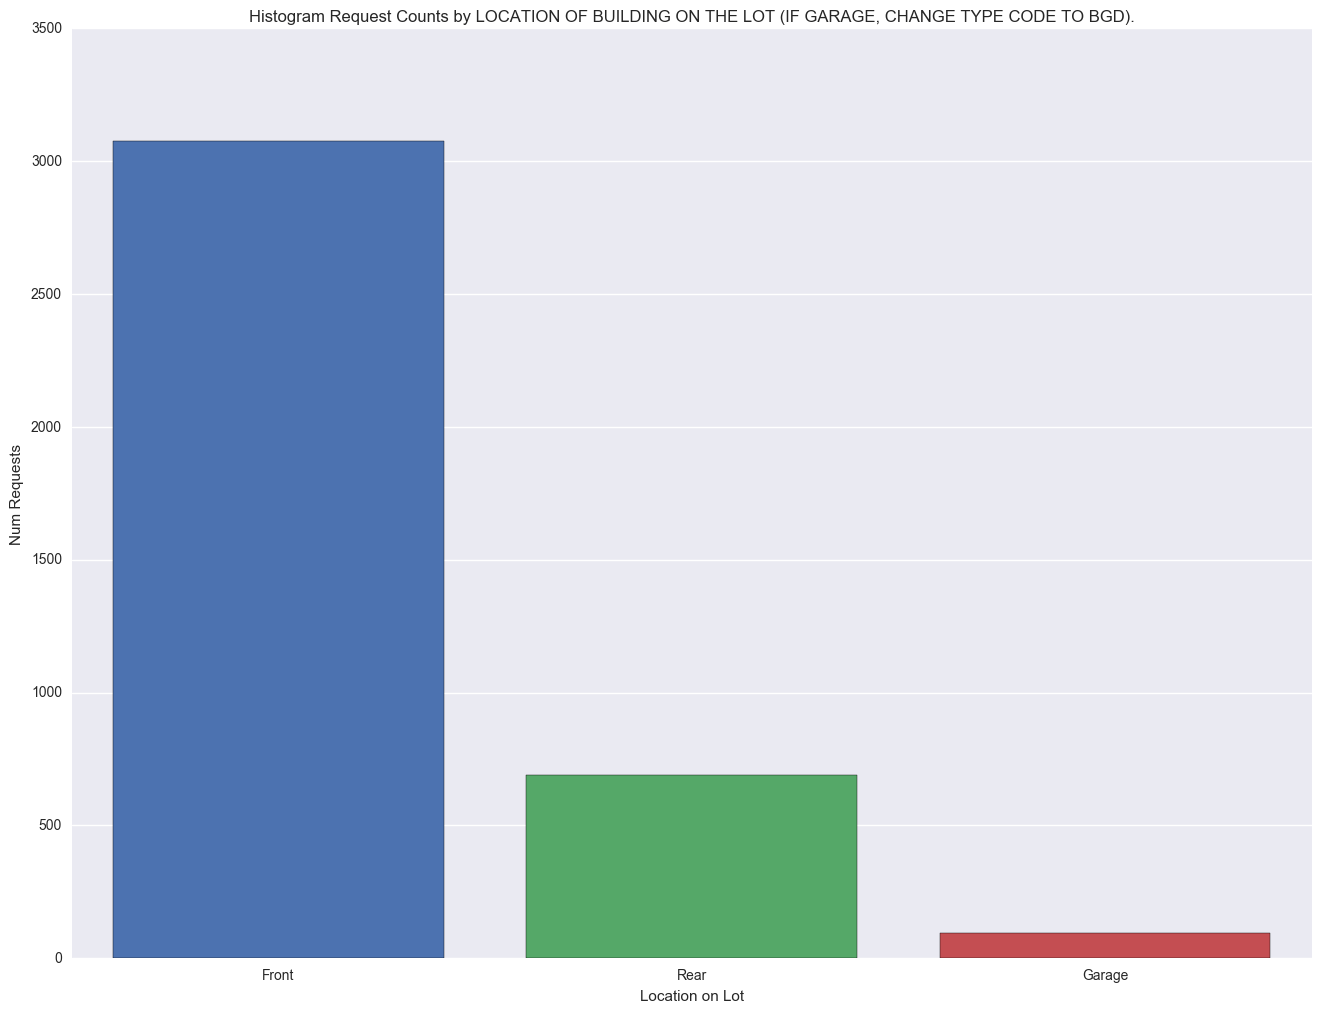

In [49]:
hist_plt(buildings, 'LOCATION OF BUILDING ON THE LOT (IF GARAGE, CHANGE TYPE CODE TO BGD).', 'Location on Lot', vertical=False, sort=True)

### Potholes Data Exploration

In [50]:
potholes = pd.read_csv('potholes_report.csv')

In [51]:
potholes.drop('SERVICE REQUEST NUMBER', axis=1, inplace=True)
potholes.drop('TYPE OF SERVICE REQUEST', axis=1, inplace=True)
potholes.drop('STREET ADDRESS', axis=1, inplace=True)
potholes.drop('X COORDINATE', axis=1, inplace=True)
potholes.drop('Y COORDINATE', axis=1, inplace=True)
potholes.drop('SSA', axis=1, inplace=True)
potholes.drop('LATITUDE', axis=1, inplace=True)
potholes.drop('LONGITUDE', axis=1, inplace=True)
potholes.drop('LOCATION', axis=1, inplace=True)
potholes = potholes.drop(potholes.index[potholes['Ward'] == 0.0])
potholes = potholes.drop(potholes.index[potholes['ZIP'] == 0.0])
potholes = potholes.drop(potholes.index[potholes['Police District'] == 0.0])
potholes = potholes.drop(potholes.index[potholes['Community Area'] == 0.0])

In [52]:
# drop rows without creation dates
potholes = potholes.dropna(subset =['CREATION DATE'])

In [53]:
a = list(potholes['CREATION DATE'])
b = list(potholes['COMPLETION DATE'])
combined = list(zip(a,b))
days_list = []

for i in combined:
    start, end = i
    if type(start) and type(end) == str:
        days = days_between(start, end)
        days_list.append(days)

df_days = pd.DataFrame({'Response Time (Days)': days_list})
potholes = pd.concat([potholes,df_days], axis=1)

In [54]:
month_list = []

for i in potholes['CREATION DATE']:
    if type(i) != float:
        clean = datetime.strptime(i, '%m/%d/%Y')
        month_list.append(clean.month)

df_months = pd.DataFrame({'Month': month_list})
potholes = pd.concat([potholes,df_months], axis=1)

In [55]:
potholes.head()

,CREATION DATE,STATUS,COMPLETION DATE,CURRENT ACTIVITY,MOST RECENT ACTION,NUMBER OF POTHOLES FILLED ON BLOCK,ZIP,Ward,Police District,Community Area,Response Time (Days),Month
0,01/01/2016,Completed - Dup,01/04/2016,NaN,NaN,NaN,60647.0,35.0,14.0,22.0,3.0,1.0
1,01/01/2016,Completed,01/04/2016,Final Outcome,Pothole Patched,6.0,60655.0,19.0,22.0,74.0,3.0,1.0
2,01/01/2016,Completed,01/04/2016,Final Outcome,Pothole Patched,2.0,60655.0,19.0,22.0,74.0,3.0,1.0
3,01/01/2016,Completed - Dup,01/05/2016,NaN,NaN,NaN,60639.0,31.0,25.0,19.0,4.0,1.0
4,01/01/2016,Completed - Dup,01/05/2016,NaN,NaN,NaN,60639.0,31.0,25.0,21.0,4.0,1.0


In [56]:
pd.DataFrame(potholes['MOST RECENT ACTION'].groupby(potholes['ZIP']).value_counts())

MOST RECENT ACTION
ZIP     MOST RECENT ACTION                                                   
60601.0 Pothole Patched                                                   236
        No Potholes Found                                                  10
        CDOT Inspect Public Way Survey Transfer Outcome                     1
        CDOT Pavement Cave-In Survey Transfer Outcome                       1
        No Such Address Found                                               1
        Not Within CDOT Jurisdiction                                        1
60602.0 Pothole Patched                                                    51
        No Potholes Found                                                  11
        CDOT Alley Pot Hole Transfer Outcome                                1
60603.0 Pothole Patched                                                   100
        No Potholes Found                                                   4
        CDOT Pavement Cave-In Survey Transfer Outcome                       1
        WM Sewer Cave In Inspection Transfer Outcome                        1
60604.0 Pothole Patched                                                    89
        No Potholes Found                                                   8
        No Such Address Found                                               3
        Completed Upon Arrival                                              1
60605.0 Pothole Patched                                                   247
        No Potholes Found                                                  23
        Completed Upon Arrival                                             10
        WM Sewer Cave In Inspection Transfer Outcome                        3
        CDOT Alley Pot Hole Transfer Outcome                                1
        CDOT Pavement Cave-In Survey Transfer Outcome                       1
        No Such Address Found                                               1
60606.0 Pothole Patched                                                    95
        No Potholes Found                                                  12
        Completed Upon Arrival                                              1
60607.0 Pothole Patched                                                   422
        No Potholes Found                                                  28
        Completed Upon Arrival                                             12
...                                                                       ...
60660.0 Street Resurfaced                                                  12
        CDOT Alley Pot Hole Transfer Outcome                               10
        No Action - See Remarks in Description                              5
        CDOT Inspect Public Way Survey Transfer Outcome                     4
        CDOT Pavement Cave-In Survey Transfer Outcome                       4
        WM Sewer Cave In Inspection Transfer Outcome                        4
        Follow-on Pot Hole in Street Created                                3
60661.0 Pothole Patched                                                   116
        No Potholes Found                                                   7
        Completed Upon Arrival                                              3
        Follow-on Pot Hole in Street Created                                1
        Not Within CDOT Jurisdiction                                        1
        Street Resurfaced                                                   1
        WM Sewer Cave In Inspection Transfer Outcome                        1
60666.0 No Such Address Found                                               1
60707.0 Pothole Patched                                                   231
        No Potholes Found                                                  26
        Completed Upon Arrival                                             17
        Street Resurfaced                                                  10
   

In [57]:
potholes['Response Time (Days)'].groupby(potholes['ZIP']).describe().unstack()

/Users/ratulesrar/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,count,mean,std,min,25%,50%,75%,max
ZIP,,,,,,,,
60601.0,259.0,24.895753,43.531072,0.0,NaN,NaN,NaN,228.0
60602.0,63.0,17.063492,32.408617,0.0,NaN,NaN,NaN,155.0
60603.0,123.0,19.869919,28.465095,0.0,NaN,NaN,NaN,151.0
60604.0,115.0,16.391304,22.646287,0.0,NaN,NaN,NaN,101.0
60605.0,337.0,23.086053,33.251857,0.0,NaN,NaN,NaN,165.0
60606.0,108.0,19.546296,35.724905,0.0,NaN,NaN,NaN,165.0
60607.0,508.0,16.078740,27.558754,0.0,NaN,NaN,NaN,203.0
60608.0,1346.0,21.439822,33.929247,0.0,NaN,NaN,NaN,245.0
60609.0,1022.0,18.044031,31.005908,0.0,NaN,NaN,NaN,256.0


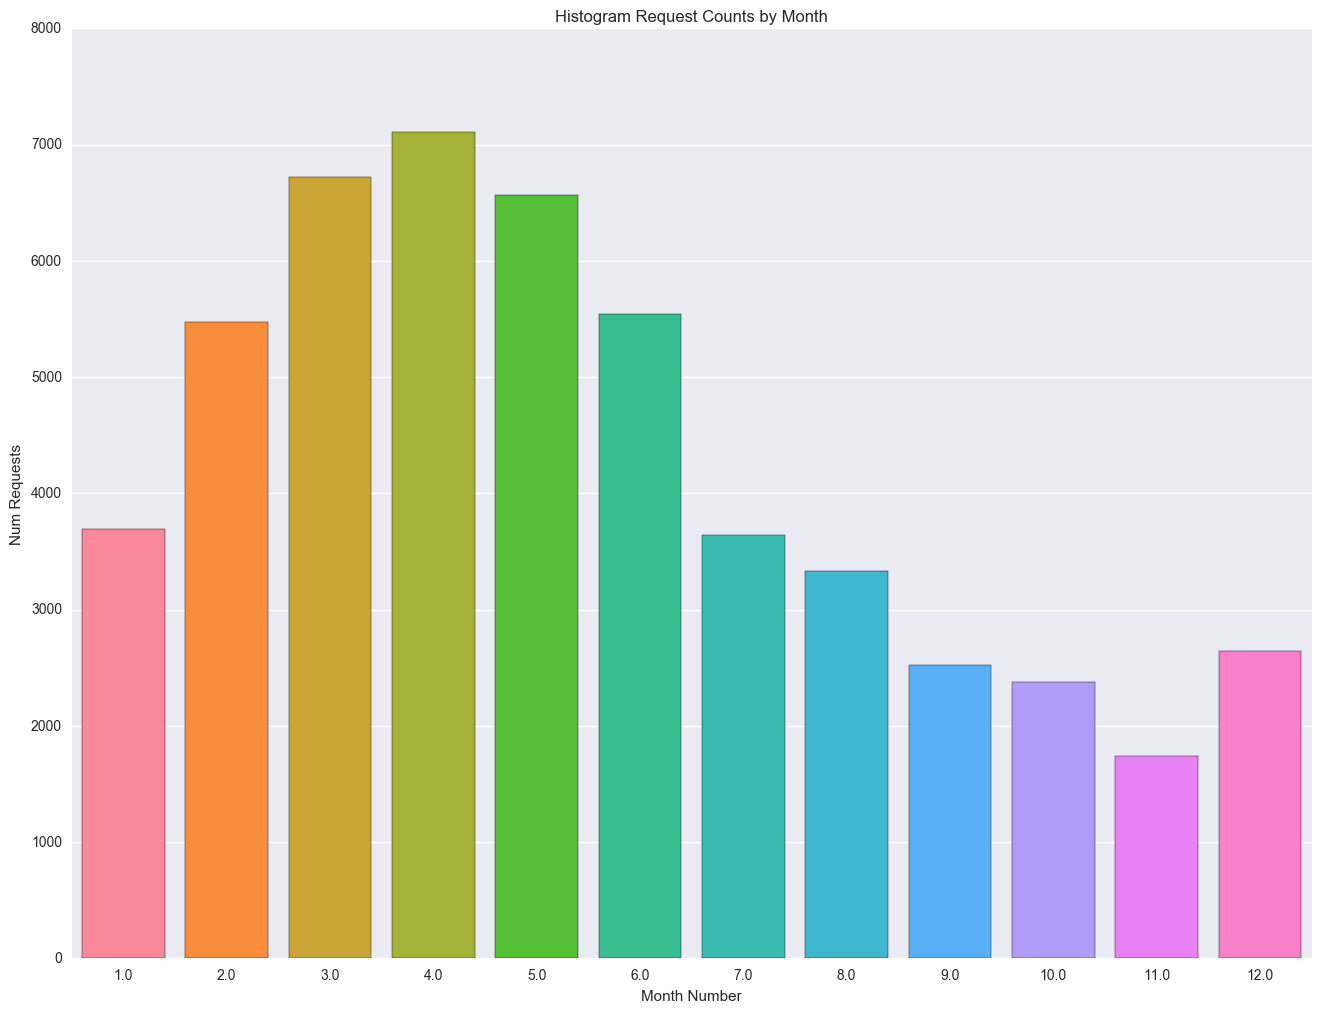

In [58]:
hist_plt(potholes, 'Month', 'Month Number', vertical=False, sort=False)

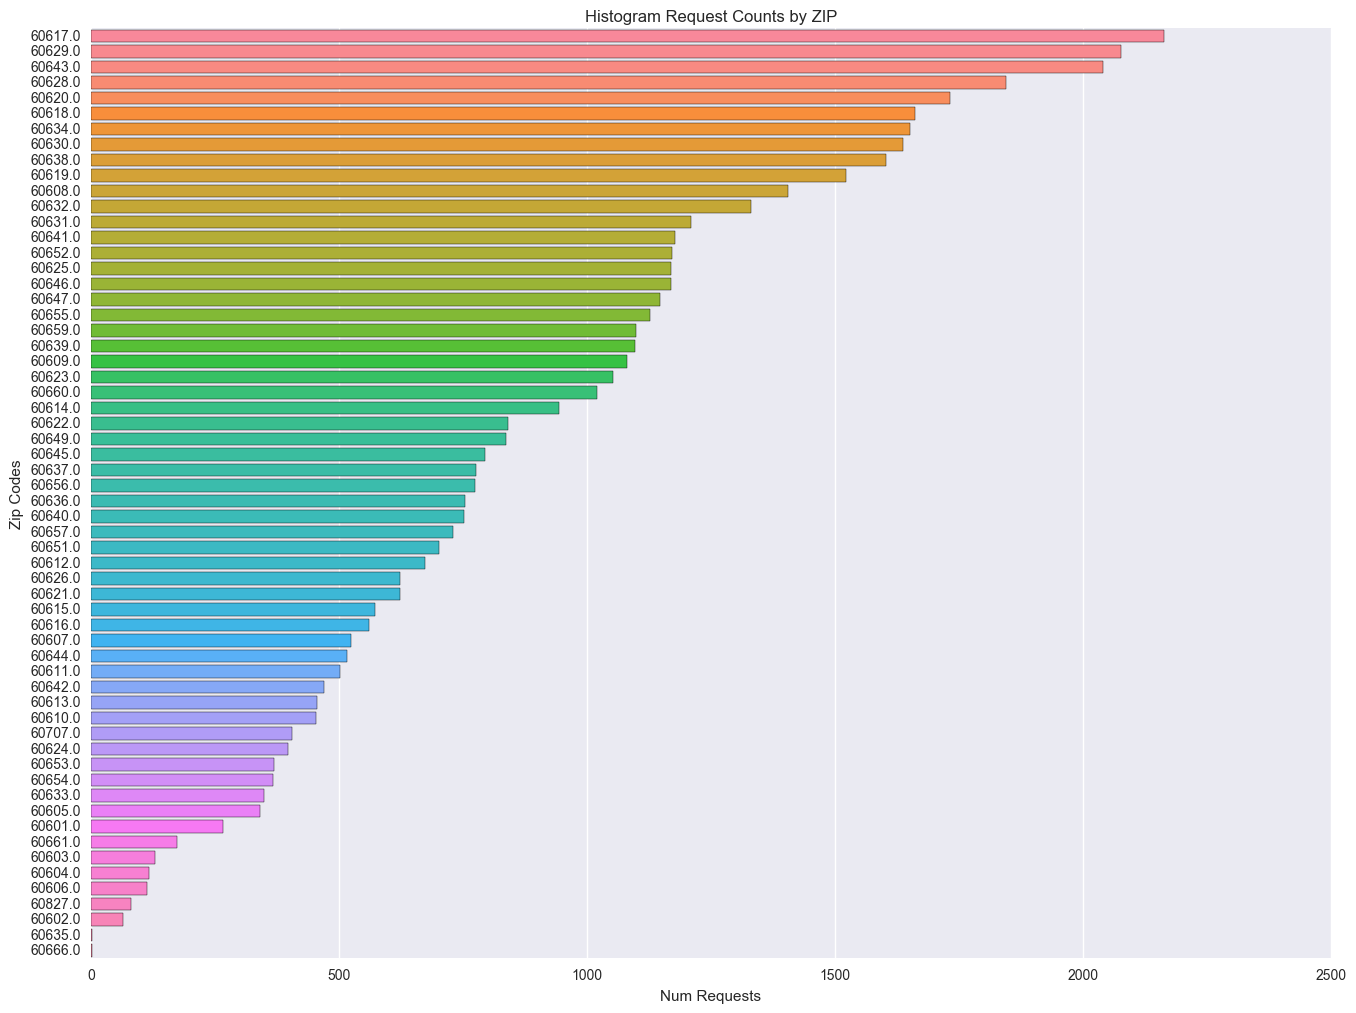

In [59]:
hist_plt(potholes, 'ZIP', 'Zip Codes', vertical=True, sort=True)

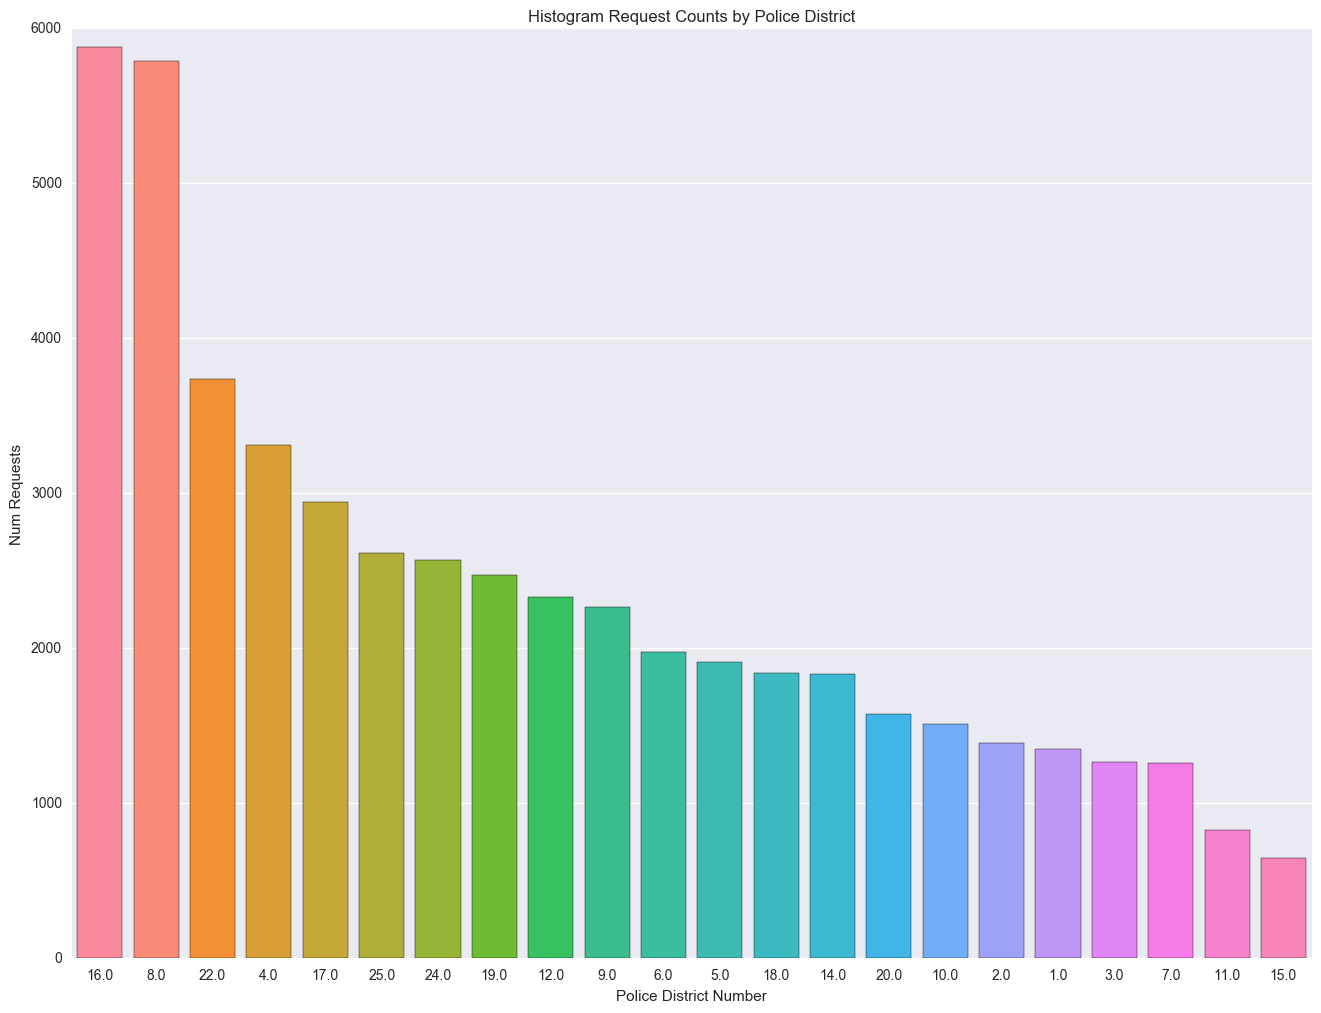

In [60]:
hist_plt(potholes, 'Police District', 'Police District Number', vertical=False, sort=True)

### Sanitation Data Exploration

In [61]:
sanitation = pd.read_csv('sanitation_complaints.csv')

In [62]:
sanitation.drop('Service Request Number', axis=1, inplace=True)
sanitation.drop('Type of Service Request', axis=1, inplace=True)
sanitation.drop('X Coordinate', axis=1, inplace=True)
sanitation.drop('Y Coordinate', axis=1, inplace=True)
sanitation.drop('Latitude', axis=1, inplace=True)
sanitation.drop('Longitude', axis=1, inplace=True)
sanitation.drop('Location', axis=1, inplace=True)
sanitation.drop('Street Address', axis=1, inplace=True)
sanitation = sanitation.drop(sanitation.index[sanitation['Ward'] == 0.0])
sanitation = sanitation.drop(sanitation.index[sanitation['ZIP Code'] == 0.0])
sanitation = sanitation.drop(sanitation.index[sanitation['Police District'] == 0.0])
sanitation = sanitation.drop(sanitation.index[sanitation['Community Area'] == 0.0])

In [63]:
a = list(sanitation['Creation Date'])
b = list(sanitation['Completion Date'])
combined = list(zip(a,b))
days_list = []

for i in combined:
    start, end = i
    if type(start) and type(end) == str:
        days = days_between(start, end)
        days_list.append(days)

df_days = pd.DataFrame({'Response Time (Days)': days_list})
sanitation = pd.concat([sanitation,df_days], axis=1)

In [64]:
month_list = []

for i in sanitation['Creation Date']:
    if type(i) != float:
        clean = datetime.strptime(i, '%m/%d/%Y')
        month_list.append(clean.month)

df_months = pd.DataFrame({'Month': month_list})
sanitation = pd.concat([sanitation,df_months], axis=1)

In [65]:
sanitation.head()

,Creation Date,Status,Completion Date,What is the Nature of this Code Violation?,ZIP Code,Ward,Police District,Community Area,Response Time (Days),Month
0,01/01/2016,Completed,01/04/2016,Dumpster not being emptied,60612.0,27,12,27,3.0,1
1,01/01/2016,Completed,01/04/2016,Garbage in yard,60619.0,6,6,44,3.0,1
2,01/01/2016,Completed,01/04/2016,Construction Site Cleanliness/Fence,60607.0,25,1,32,3.0,1
3,01/01/2016,Completed,01/04/2016,Dumpster not being emptied,60645.0,50,24,2,3.0,1
4,01/01/2016,Completed,01/04/2016,Dumpster not being emptied,60657.0,32,19,5,3.0,1


In [66]:
pd.DataFrame(sanitation['What is the Nature of this Code Violation?'].groupby(sanitation['ZIP Code']).value_counts())

What is the Nature of this Code Violation?
ZIP Code What is the Nature of this Code Violation?                                            
60601.0  Other                                                                               23
         Garbage in alley                                                                     8
         Dumpster not being emptied                                                           6
         Construction Site Cleanliness/Fence                                                  1
         Garbage in yard                                                                      1
60602.0  Garbage in alley                                                                     9
         Other                                                                                5
         Construction Site Cleanliness/Fence                                                  1
         Dumpster not being emptied                                                           1
60603.0  Garbage in alley                                                                     5
         Other                                                                                3
60604.0  Dumpster not being emptied                                                           1
         Garbage in alley                                                                     1
         Other                                                                                1
         Overflowing carts                                                                    1
60605.0  Other                                                                               32
         Garbage in alley                                                                    12
         Garbage in yard                                                                      9
         Dog feces in yard                                                                    6
         Dumpster not being emptied                                                           5
         Construction Site Cleanliness/Fence                                                  4
         Standing water                                                                       2
         Overflowing carts                                                                    1
60606.0  Other                                                                                6
         Garbage in alley                                                                     5
         Dumpster not being emptied                                                           4
         Overflowing carts                                                                    3
         Construction Site Cleanliness/Fence                                                  1
         Garbage in yard                                                                      1
         Standing water                                                                       1
...                                                                                         ...
60659.0  Garbage in alley                                                                    48
         Overflowing carts                                                                   38
         Dumpster not being emptied                                                          26
         Dog feces in yard                                                                    5
         Construction Site Cleanliness/Fence                                                  3
60660.0  Other                                                                               38
         Overflowing carts                                                                   23
         Garbage in alley                                                                    19
         Garbage in yard                                                                     18
         Dumpster not

In [67]:
sanitation['Response Time (Days)'].groupby(sanitation['ZIP Code']).describe().unstack()

/Users/ratulesrar/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,count,mean,std,min,25%,50%,75%,max
ZIP Code,,,,,,,,
60601.0,39.0,7.897436,7.454405,1.0,2.50,5.0,11.50,30.0
60602.0,19.0,5.315789,11.235127,1.0,1.00,2.0,4.50,51.0
60603.0,9.0,11.000000,12.549900,1.0,4.00,9.0,11.00,42.0
60604.0,4.0,5.000000,6.055301,1.0,1.75,2.5,5.75,14.0
60605.0,71.0,11.253521,12.418556,0.0,NaN,NaN,NaN,54.0
60606.0,23.0,9.217391,9.100232,0.0,3.00,5.0,11.00,32.0
60607.0,132.0,12.946970,17.336065,0.0,2.00,6.5,21.00,147.0
60608.0,561.0,8.511586,15.247961,0.0,NaN,NaN,NaN,165.0
60609.0,554.0,11.566787,16.157119,0.0,NaN,NaN,NaN,144.0


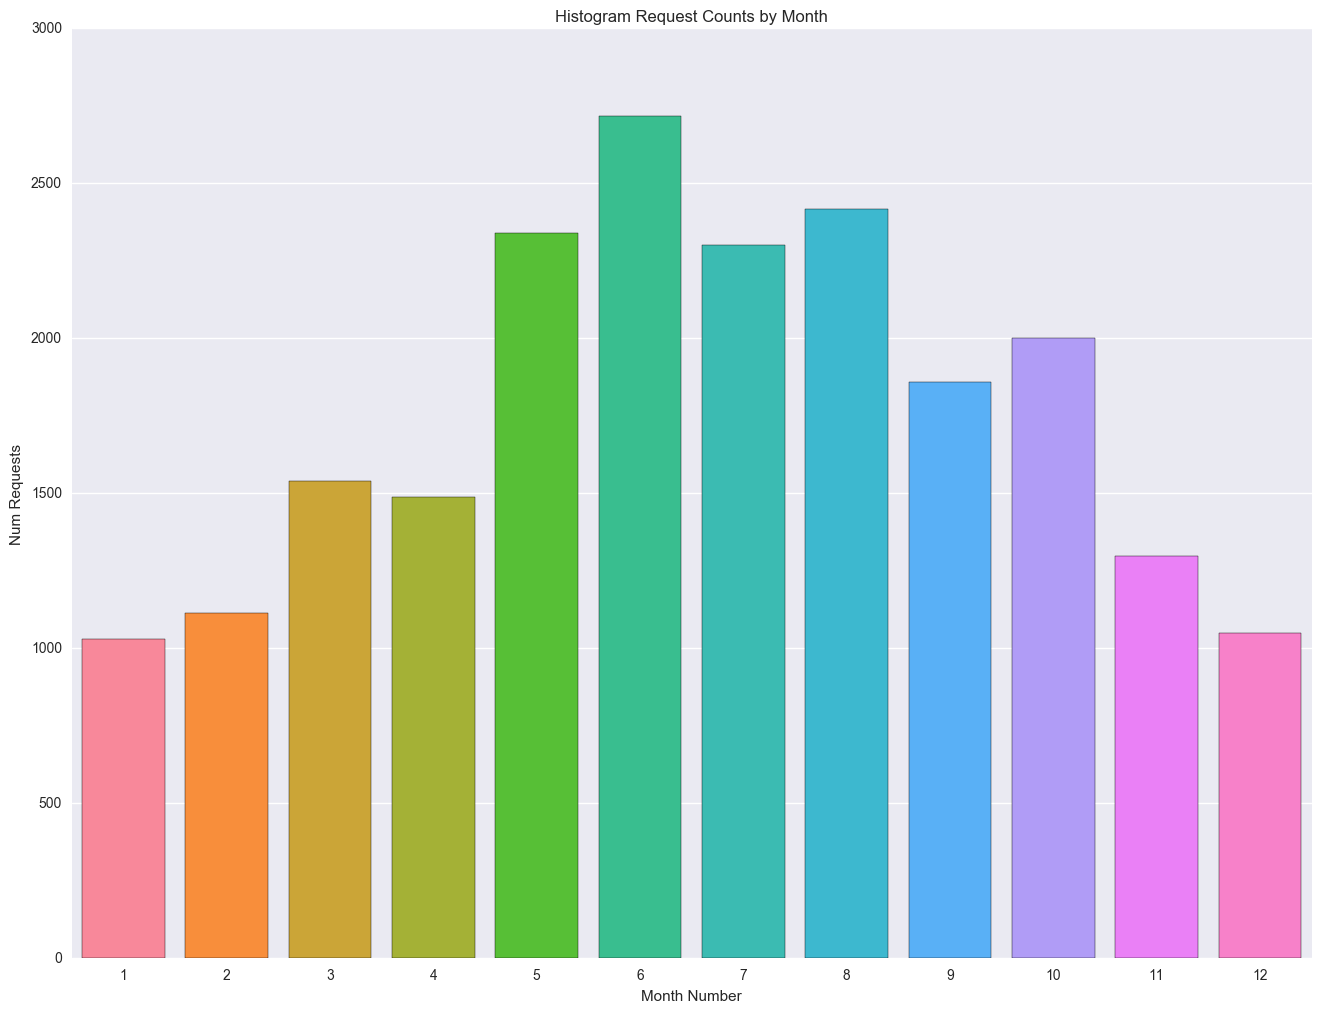

In [68]:
hist_plt(sanitation, 'Month', 'Month Number', vertical=False, sort=False)

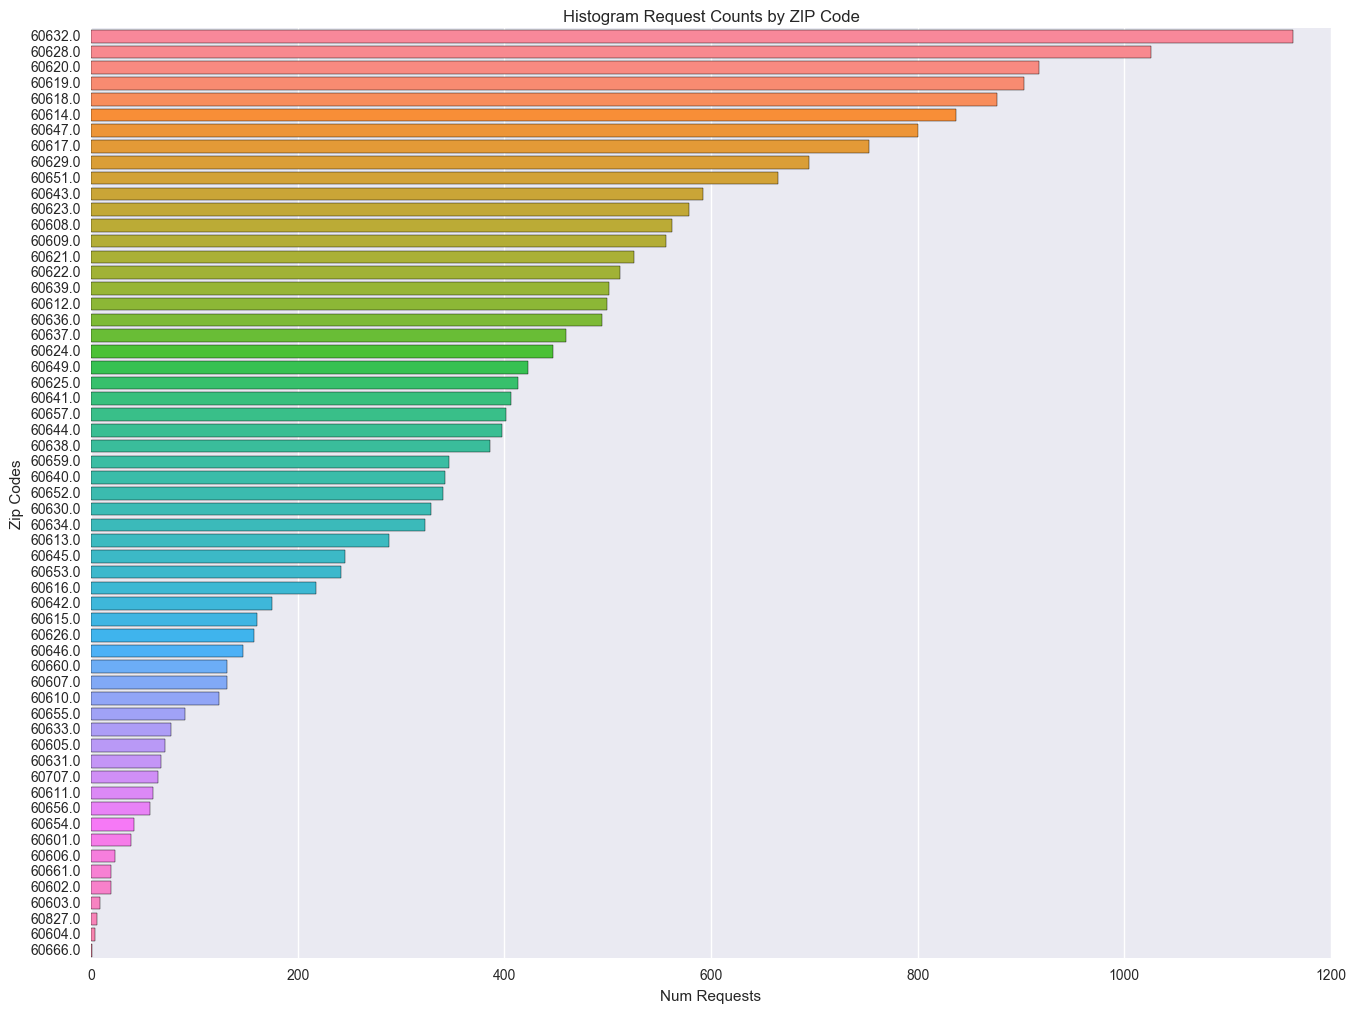

In [69]:
hist_plt(sanitation, 'ZIP Code', 'Zip Codes', vertical=True, sort=True)

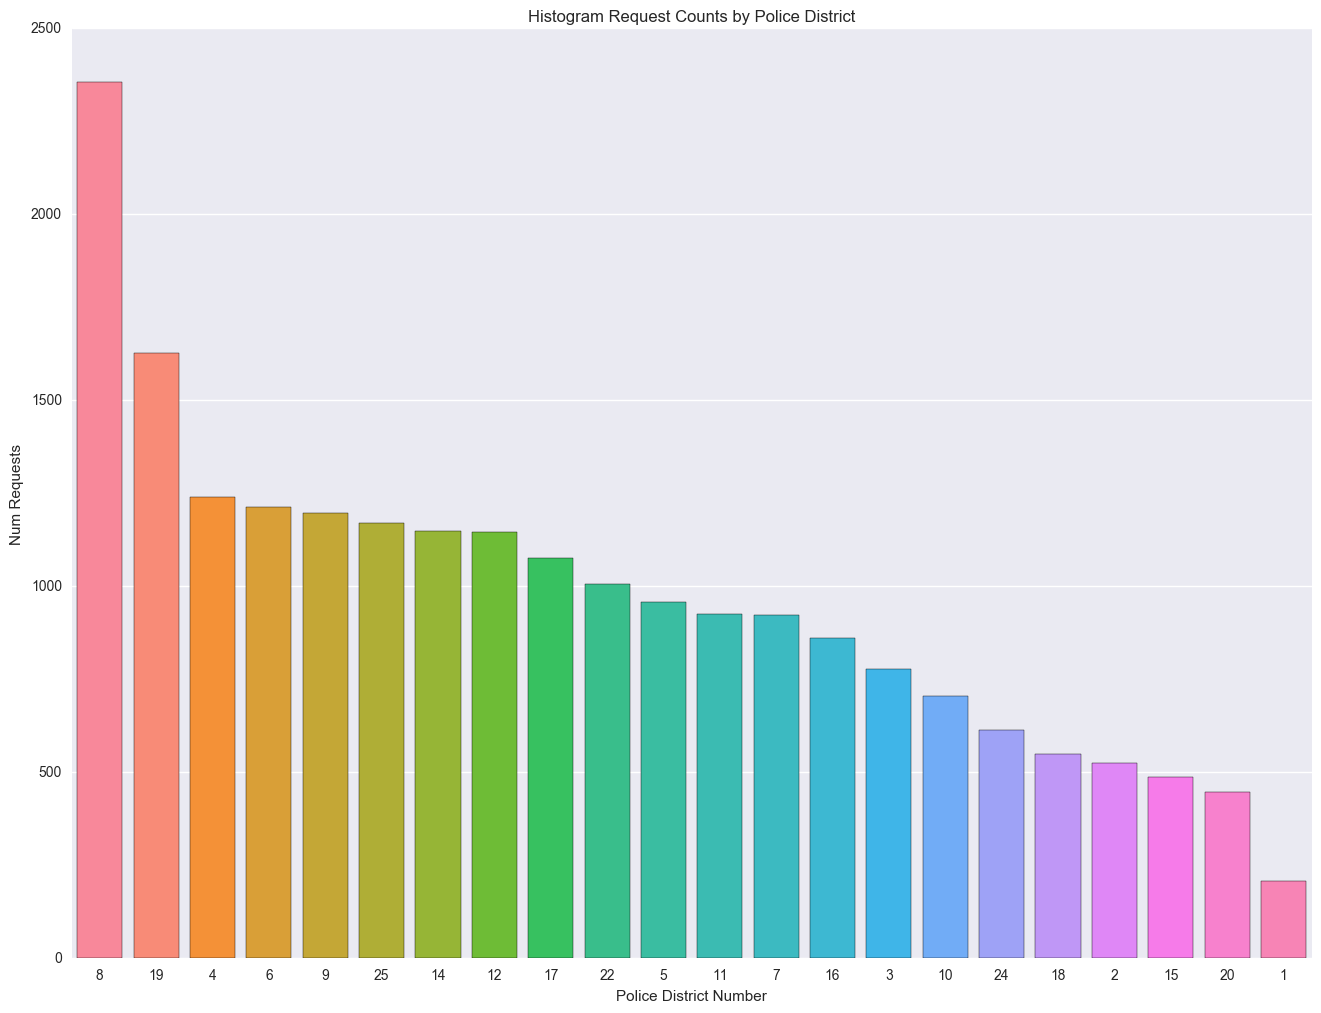

In [70]:
hist_plt(sanitation, 'Police District', 'Police District Number', vertical=False, sort=True)

### Summary of Findings

#### Graffiti
- The month of August had the highest number of requests (~ 12,000)
- 60632 was the zip code with the most number of requests (~ 14,000)
- The 8th Police District experiences the highest number of requests ~ 18,750)

#### Vacant & Abandoned Buildings
- The month of May had the highest number of requests (~ 600)
- 60636 was the zip code with the most number of requests (~ 525)
- The 7th Police District experiences the highest number of requests ~ 800)

#### Potholes
- The month of April had the highest number of requests (~ 7000)
- 60617 was the zip code with the most number of requests (~ 2500)
- The 8th Police District experiences the highest number of requests ~ 6,000)

#### Sanitation
- The month of June had the highest number of requests (~ 2,750)
- 60632 was the zip code with the most number of requests (~ 12,000)
- The 8th Police District experiences the highest number of requests ~ 2,750)

#### Interesting Stuff
- Zip code 60632 and the 7/8 wards seem to have the largest number of requests.
- Graffiti requests outnumber the other three by far. I think this has to do with people only inputting data once the request has been completed